### Clipping a raster by a shapefile

In this tutorial you'll find out how to crop a raster stack by a shapefile using two methods. I must confess that it took me a whole day to figure it out the best way to clip, crop or mask raster stacks by shapefiles in python. Here I am presenting these two methods that might help you.  

Those were the links I used:  
https://gist.github.com/cordmaur/620c6272c1fcef6274705516f28d7961
https://corteva.github.io/rioxarray/stable/examples/clip_geom.html

In [148]:
## Import libraries
import rasterio
import rioxarray
import geopandas
import numpy as np
import matplotlib.pyplot as plt
from rasterio.mask import mask
from shapely.geometry import box

%matplotlib inline

### Using the fucntion mask() from rasterio

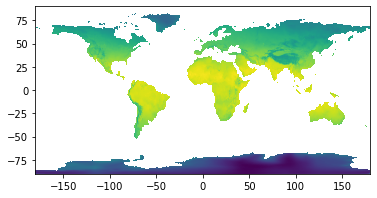

In [146]:
## Load raster stack and plot
climate_world = rio.open("SP_municipios_2021/climate_stack.tif")
show(climate_world)
plt.show()

In [169]:
## Load shapefile and extract the extent
aoi_in = 'SP_municipios_2021'
aoi = gp.read_file(aoi_in)

coords = [json.loads(aoi.to_json())["features"][0]["geometry"]]
coords

[{'type': 'MultiPolygon',
  'coordinates': [[[[-47.911410589933666, -25.162918840908254],
     [-47.908408084698294, -25.16694830104732],
     [-47.9135055756623, -25.16684730740853],
     [-47.911410589933666, -25.162918840908254]]],
   [[[-46.901777157689324, -24.394165799843314],
     [-46.903395619326744, -24.396625772048893],
     [-46.90626010311176, -24.394412282153787],
     [-46.906651615636825, -24.389684316739412],
     [-46.903123140971665, -24.38724832873592],
     [-46.901777157689324, -24.394165799843314]]],
   [[[-46.904459167740704, -24.377401859259173],
     [-46.908589603897006, -24.380528363067732],
     [-46.910651121519216, -24.377446384529662],
     [-46.9094086398137, -24.373831371443806],
     [-46.904536683777316, -24.373831391918806],
     [-46.904459167740704, -24.377401859259173]]],
   [[[-46.974882108604916, -24.36962108093016],
     [-46.97701607822015, -24.372281056825436],
     [-46.97987605090354, -24.370959574062397],
     [-46.978995588195644, -24.36

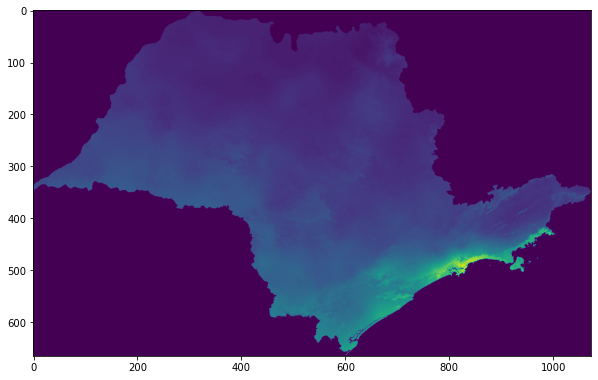

In [172]:
## Mask by the shapefile extent
climate_mask, affine = mask(dataset=climate_world, shapes=coords, crop=True, nodata=0)
plt.figure(figsize=(10, 10))
plt.imshow(climate_mask[5])  ## Plot the 5th band
plt.show()

#### Note:  
I am still trying to figure it out the best way to save this masked array to a raster stack, but I couldn't find a way. When I find out, I'll update here!

### Using the function clip from rioxarray

In [171]:
### Load the raster with rioxarray
climate_worl_xarray = rioxarray.open_rasterio("SP_municipios_2021/climate_stack.tif")

In [160]:
## Load the extent of the shapefile. I get these coordinates in Qgis, consulting the information section of the shapefile
geodf = geopandas.GeoDataFrame(
    geometry=[box(-53.1101115319999550,-25.3579997779999857, -44.1613651639999247,-19.7796557949999041)],
    crs="EPSG:4326")

In [166]:
## Clip the raster
clipped = rioxarray.open_rasterio("SP_municipios_2021/climate_stack.tif",masked=True).rio.clip(geodf.geometry, geodf.crs, from_disk=True)

In [168]:
## Save the raster
clipped.rio.to_raster("clipped_stack_xarray.tif")